In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
read_csv_opts = {'sep': '|',
                 'quotechar': '"',
                 'compression': 'gzip',
                 'encoding': 'utf-8',
                 'header': 6}

In [3]:
arrests = pd.read_csv('../input/arrests.csv.gz', **read_csv_opts)
bookins = pd.read_csv('../input/bookins.csv.gz', **read_csv_opts)
expedited = pd.read_csv('../input/expedited-removals.csv.gz', **read_csv_opts)
other = pd.read_csv('../input/other-removals.csv.gz', **read_csv_opts)

In [4]:
arrests.head()

,Arrest Date,Date of Birth,Gender,Country of Citizenship,Event Number,Apprehension Landmark,Arrest Method,Most Serious Conviction
0,1/1/2012,"(b)(6),(b)(7)c)",Male,MEXICO,(b)(7)e),SNOHOMISH COUNTY JAIL,CAP Local Incarceration,NaN
1,1/1/2012,"(b)(6),(b)(7)c)",Male,MEXICO,(b)(7)e),FRANKLIN CO. JAIL,CAP Local Incarceration,NaN
2,1/1/2012,"(b)(6),(b)(7)c)",Male,MEXICO,(b)(7)e),BENTON CO. JAIL,CAP Local Incarceration,NaN
3,1/1/2012,"(b)(6),(b)(7)c)",Male,MEXICO,(b)(7)e),COLUMBIA COUNTY JAIL,CAP Local Incarceration,NaN
4,1/1/2012,"(b)(6),(b)(7)c)",Male,MEXICO,(b)(7)e),FRANKLIN CO. JAIL,CAP Local Incarceration,NaN


In [5]:
bookins.head()

,Book In Date,Date of Birth,Gender,Country of Citizenship,Detention Facility,Apprehension Method,Most Serious Conviction
0,1/1/2012,"(b)(6),(b)(7)c)",Male,MEXICO,NORTHWEST DET. CENTER,Other Agency (turned over to INS),NaN
1,1/1/2012,"(b)(6),(b)(7)c)",Male,MEXICO,NORTHWEST DET. CENTER,Patrol Border,NaN
2,1/2/2012,"(b)(6),(b)(7)c)",Male,HONDURAS,NORTHWEST DET. CENTER,Other Agency (turned over to INS),NaN
3,1/2/2012,"(b)(6),(b)(7)c)",Male,FRANCE,NORTHWEST DET. CENTER,Inspections,NaN
4,1/2/2012,"(b)(6),(b)(7)c)",Female,SWITZERLAND,NORTHWEST DET. CENTER,Inspections,NaN


In [6]:
expedited.head()

,Departed Date,Date of Birth,Gender,Country of Citizenship,Event Number,Most Serious Conviction,Case Category
0,1/3/2012,"(b)(6),(b)(7)c)",Male,FRANCE,(b)(7)e),NaN,[8F] Expedited Removal
1,1/5/2012,"(b)(6),(b)(7)c)",Female,EL SALVADOR,(b)(7)e),NaN,[8G] Expedited Removal - Credible Fear Referral
2,1/6/2012,"(b)(6),(b)(7)c)",Female,BELIZE,(b)(7)e),NaN,[8F] Expedited Removal
3,1/11/2012,"(b)(6),(b)(7)c)",Female,EL SALVADOR,(b)(7)e),NaN,[8G] Expedited Removal - Credible Fear Referral
4,1/11/2012,"(b)(6),(b)(7)c)",Female,EL SALVADOR,(b)(7)e),NaN,[8F] Expedited Removal


In [7]:
other.head()

,Departed Date,Date of Birth,Gender,Country of Citizenship,Event Number,Most Serious Conviction,Case Category
0,1/3/2012,"(b)(6),(b)(7)c)",Male,MEXICO,(b)(7)e),NaN,[8C] Excludable / Inadmissible - Administrativ...
1,1/3/2012,"(b)(6),(b)(7)c)",Female,MEXICO,(b)(7)e),NaN,[3] Deportable - Administratively Final Order
2,1/4/2012,"(b)(6),(b)(7)c)",Male,MEXICO,(b)(7)e),NaN,[8C] Excludable / Inadmissible - Administrativ...
3,1/4/2012,"(b)(6),(b)(7)c)",Male,MEXICO,(b)(7)e),NaN,[16] Reinstated Final Order
4,1/4/2012,"(b)(6),(b)(7)c)",Male,MEXICO,(b)(7)e),NaN,[16] Reinstated Final Order


In [8]:
arrests['Arrest Date'] = pd.to_datetime(arrests['Arrest Date'])
# arrests.set_index('Arrest Date', inplace=True)

In [9]:
arrests['Arrest Date'].max()

Timestamp('2019-07-05 00:00:00')

In [10]:
arrests.columns

Index(['Arrest Date', 'Date of Birth', 'Gender', 'Country of Citizenship',
       'Event Number', 'Apprehension Landmark', 'Arrest Method',
       'Most Serious Conviction'],
      dtype='object')

In [11]:
arrests['Most Serious Conviction'] = arrests['Most Serious Conviction'].str.upper()
arrests['Most Serious Conviction'] = arrests['Most Serious Conviction'].str.strip()

In [12]:
len(arrests['Most Serious Conviction'].unique())

257

In [13]:
arrests['Most Serious Conviction'].value_counts(dropna=False, normalize=True).head(10)

NaN                               0.663277
ASSAULT                           0.050724
DRIVING UNDER INFLUENCE LIQUOR    0.043074
TRAFFIC OFFENSE                   0.017635
LARCENY                           0.012596
DOMESTIC VIOLENCE                 0.011306
DRUG TRAFFICKING                  0.011030
AMPHETAMINE - SELL                0.009463
BURGLARY                          0.008357
SEX ASSAULT                       0.007804
Name: Most Serious Conviction, dtype: float64

In [14]:
arrests['Apprehension Landmark'] = arrests['Apprehension Landmark'].str.upper()
arrests['Apprehension Landmark'] = arrests['Apprehension Landmark'].str.strip()

In [15]:
len(arrests['Apprehension Landmark'].unique())

299

In [16]:
arrests['Apprehension Landmark'].value_counts(dropna=False).head(10)

POO CAP NON-CUSTODIAL ARREST                 1576
SEA CAP                                      1445
FRANKLIN CO. JAIL                            1408
WASHINGTON COUNTY JAIL                       1106
YAKIMA COUNTY JAIL                           1058
GRANT CO. JAIL, WA                           1007
MULTNOMAH COUNTY JAILS (INVERNESS & MCDC)    1006
SEATTLE FUG OPS                               996
BENTON CO. JAIL                               854
FEDERAL DETENTION CENTER (FDC)                843
Name: Apprehension Landmark, dtype: int64

In [17]:
len(arrests['Arrest Method'].unique())

18

In [20]:
arrests.head()

,Arrest Date,Date of Birth,Gender,Country of Citizenship,Event Number,Apprehension Landmark,Arrest Method,Most Serious Conviction
0,2012-01-01,"(b)(6),(b)(7)c)",Male,MEXICO,(b)(7)e),SNOHOMISH COUNTY JAIL,CAP Local Incarceration,NaN
1,2012-01-01,"(b)(6),(b)(7)c)",Male,MEXICO,(b)(7)e),FRANKLIN CO. JAIL,CAP Local Incarceration,NaN
2,2012-01-01,"(b)(6),(b)(7)c)",Male,MEXICO,(b)(7)e),BENTON CO. JAIL,CAP Local Incarceration,NaN
3,2012-01-01,"(b)(6),(b)(7)c)",Male,MEXICO,(b)(7)e),COLUMBIA COUNTY JAIL,CAP Local Incarceration,NaN
4,2012-01-01,"(b)(6),(b)(7)c)",Male,MEXICO,(b)(7)e),FRANKLIN CO. JAIL,CAP Local Incarceration,NaN


In [21]:
arrests.set_index('Arrest Date', inplace=True)

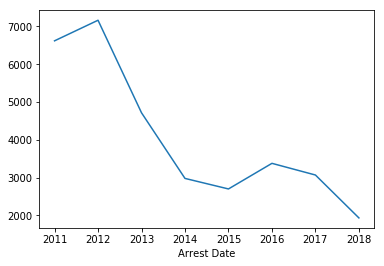

In [22]:
arrests.groupby(pd.Grouper(freq='AS-OCT'))['Event Number'].count().plot()

In [23]:
arrests_by_method = arrests.groupby([pd.Grouper(freq='AS-OCT'), 'Arrest Method'])['Event Number'].count().unstack()

In [24]:
cap_local = arrests_by_method['CAP Local Incarceration']

In [25]:
methods = list(arrests_by_method.columns)
methods.remove('CAP Local Incarceration')

In [26]:
all_other = arrests_by_method[methods].sum(axis=1)

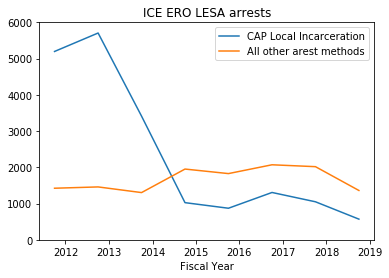

In [27]:
plt.plot(cap_local, label='CAP Local Incarceration')
plt.plot(all_other, label='All other arest methods')
plt.ylim([0, 6000])
plt.title('ICE ERO LESA arrests')
plt.xlabel('Fiscal Year')
plt.legend();

In [28]:
KBFI_dropoffs = pd.read_csv('../../../../ice-air/installment2/analyze/output/KBFI-dropoffs.csv', header=None)

FileNotFoundError: File b'../../../../ice-air/installment2/analyze/output/KBFI-dropoffs.csv' does not exist

In [ ]:
KBFI_dropoffs.columns = ['FY', 'Dropoff total']

In [ ]:
KBFI_dropoffs['FY'] = pd.to_datetime(KBFI_dropoffs['FY'])

In [ ]:
KBFI_dropoffs.set_index('FY', inplace=True)

In [ ]:
temp = pd.DataFrame([KBFI_dropoffs, all_other])

In [ ]:
other_arrests_plus_ice_air = KBFI_dropoffs['Dropoff total'] + all_other

In [ ]:
plt.plot(cap_local, label='CAP Local Incarceration only')
plt.plot(other_arrests_plus_ice_air, label='Other arrests, plus ICE Air')
plt.ylim([0, 6000])
plt.title('Local arrests plus ICE Air dropoffs')
plt.xlabel('Fiscal Year')
plt.legend();

In [29]:
grant_co_jail = arrests[arrests['Apprehension Landmark'] == 'GRANT CO. JAIL, WA']

In [30]:
grant_co_jail['Country of Citizenship'].value_counts(dropna=False, normalize=True)

MEXICO                0.932473
EL SALVADOR           0.032771
GUATEMALA             0.016882
HONDURAS              0.004965
UKRAINE               0.002979
UNKNOWN               0.001986
KENYA                 0.000993
CANADA                0.000993
ITALY                 0.000993
NICARAGUA             0.000993
CAMBODIA              0.000993
PERU                  0.000993
TONGA                 0.000993
BOSNIA-HERZEGOVINA    0.000993
Name: Country of Citizenship, dtype: float64

In [31]:
arrests['Country of Citizenship'].value_counts(dropna=False, normalize=True).head(10)

MEXICO         0.797413
GUATEMALA      0.054718
EL SALVADOR    0.026698
HONDURAS       0.021998
VIETNAM        0.007066
UKRAINE        0.006329
CUBA           0.004178
SOMALIA        0.004025
PHILIPPINES    0.003963
CAMBODIA       0.003933
Name: Country of Citizenship, dtype: float64

In [32]:
bookins.columns

Index(['Book In Date', 'Date of Birth', 'Gender', 'Country of Citizenship',
       'Detention Facility', 'Apprehension Method', 'Most Serious Conviction'],
      dtype='object')

In [33]:
bookins['Book In Date'] = pd.to_datetime(bookins['Book In Date'])
bookins.set_index('Book In Date', inplace=True)

In [34]:
bookins['Most Serious Conviction'] = bookins['Most Serious Conviction'].str.upper()
bookins['Most Serious Conviction'] = bookins['Most Serious Conviction'].str.strip()

In [35]:
bookins['Most Serious Conviction'].value_counts(dropna=False, normalize=True).head(10)

NaN                               0.677895
ASSAULT                           0.048219
DRIVING UNDER INFLUENCE LIQUOR    0.040749
TRAFFIC OFFENSE                   0.016490
LARCENY                           0.011518
DOMESTIC VIOLENCE                 0.010839
DRUG TRAFFICKING                  0.010242
AMPHETAMINE - SELL                0.008938
BURGLARY                          0.008150
SEX ASSAULT                       0.007498
Name: Most Serious Conviction, dtype: float64

In [36]:
bookins.tail()

,Date of Birth,Gender,Country of Citizenship,Detention Facility,Apprehension Method,Most Serious Conviction
Book In Date,,,,,,
2019-07-03,"(b)(6),(b)(7)c)",Male,NETHERLANDS,TACOMA ICE PROCESSING CENTER,Inspections,NaN
2019-07-03,"(b)(6),(b)(7)c)",Male,MEXICO,EUGENE HOLDROOM,Non-Custodial Arrest,SEX ASSAULT
2019-07-03,"(b)(6),(b)(7)c)",Male,LAOS,TACOMA ICE PROCESSING CENTER,NaN,POSSESSION OF WEAPON
2019-07-05,"(b)(6),(b)(7)c)",Female,MEXICO,SEATTLE FIELD OFFICE HOLD ROOM,CAP Federal Incarceration,DRUG TRAFFICKING
2019-07-05,"(b)(6),(b)(7)c)",Male,PHILIPPINES,SEATTLE FIELD OFFICE HOLD ROOM,Located,ASSAULT


In [37]:
nwdc = bookins['Detention Facility'].isin(['NORTHWEST DET. CENTER', 'TACOMA ICE PROCESSING CENTER'])

In [38]:
# No MSCC data for first few years
bookins[nwdc]['Most Serious Conviction'].value_counts(dropna=False, normalize=True).head(15)

NaN                                                        0.849602
ASSAULT                                                    0.025398
DRIVING UNDER INFLUENCE LIQUOR                             0.016600
TRAFFIC OFFENSE                                            0.010624
LARCENY                                                    0.008632
BURGLARY                                                   0.005312
DRUG TRAFFICKING                                           0.005312
DOMESTIC VIOLENCE                                          0.004980
ILLEGAL ENTRY (INA SEC.101(A)(43)(O), 8USC1325 ONLY)       0.004150
HIT AND RUN                                                0.003818
DRUG POSSESSION                                            0.003320
ROBBERY                                                    0.002822
POSSESSION OF WEAPON                                       0.002822
ILLEGAL RE-ENTRY (INA SEC.101(A)(43)(O), 8USC1326 ONLY)    0.002490
DANGEROUS DRUGS                                 

In [39]:
bookins[nwdc]['2019']['Most Serious Conviction'].value_counts(dropna=False, normalize=True)

NaN                                                                        0.808511
ASSAULT                                                                    0.028369
DRIVING UNDER INFLUENCE LIQUOR                                             0.023641
TRAFFIC OFFENSE                                                            0.016548
LARCENY                                                                    0.014184
PUBLIC ORDER CRIMES                                                        0.011820
ILLEGAL ENTRY (INA SEC.101(A)(43)(O), 8USC1325 ONLY)                       0.007092
HIT AND RUN                                                                0.007092
DRUG TRAFFICKING                                                           0.007092
ROBBERY                                                                    0.007092
OBSTRUCT POLICE                                                            0.007092
BURGLARY                                                                   0

In [40]:
all_bookins = bookins.groupby(pd.Grouper(freq='AS-OCT'))['Date of Birth'].count()

In [41]:
nwdc_bookins = bookins[nwdc].groupby(pd.Grouper(freq='AS-OCT'))['Date of Birth'].count()

In [42]:
nwdc_bookins

Book In Date
2011-10-01    1259
2012-10-01     854
2013-10-01     694
2014-10-01     554
2015-10-01     613
2016-10-01     664
2017-10-01     755
2018-10-01     631
Freq: AS-OCT, Name: Date of Birth, dtype: int64

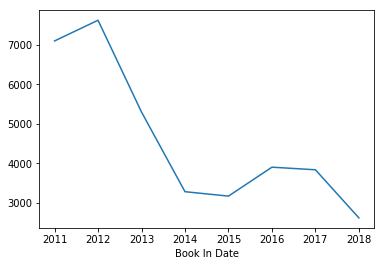

In [43]:
bookins.groupby(pd.Grouper(freq='AS-OCT'))['Date of Birth'].count().plot()

In [ ]:
plt.plot(nwdc_bookins)
plt.plot(KBFI_dropoffs['Dropoff total'])

In [ ]:
plt.plot(all_bookins)
plt.plot(KBFI_dropoffs['Dropoff total'])

In [ ]:
bookins.head()

In [ ]:
bookins.groupby(pd.Grouper(freq='AS-OCT'))['Detention Facility'].value_counts()

In [47]:
all_arrests = arrests.groupby(pd.Grouper(freq='AS-OCT'))['Date of Birth'].count()

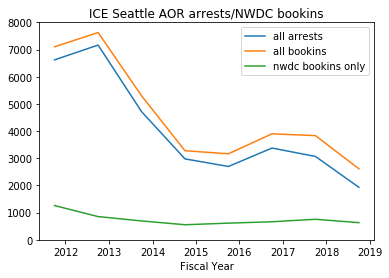

In [62]:
plt.plot(all_arrests, label='all arrests')
plt.plot(all_bookins, label='all bookins')
plt.plot(nwdc_bookins, label='nwdc bookins only')
plt.ylim([0, 8000])
plt.title('ICE Seattle AOR arrests/NWDC bookins')
plt.xlabel('Fiscal Year')
plt.legend();

In [72]:
bookins.groupby(pd.Grouper(freq='AS-OCT'))['Detention Facility'].value_counts().unstack()

Detention Facility,ADAMS COUNTY,ANCHORAGE JAIL,BELLINGHAM BPS ERO HOLDROOM,CHELAN CO. REGIONAL JAIL,COLUMBIA COUNTY JAIL,"COOK INLET PRETRIAL, ANCH",COWLITZ CO. JUV. DET.,DOUGLAS CO. JAIL,ECONOLODGE MOTEL,EUGENE HOLDROOM,...,"SITKA CITY JAIL, SITKA AK",SPRINGFIELD CITY JAIL,STEVENS COUNTY JAIL,SUNNYSIDE JAIL,TACOMA ICE PROCESSING CENTER,UMATILLA CO JAIL,WILDWOOD PRE-TRIAL FAC.,WILDWOOD STATE CORR. CTR.,YAKIMA COUNTY,YAKIMA SUB-OFFICE
Book In Date,,,,,,,,,,,,,,,,,,,,,
2011-10-01,4.0,25.0,NaN,14.0,22.0,6.0,1.0,1.0,NaN,376.0,...,NaN,NaN,NaN,NaN,NaN,41.0,2.0,NaN,317.0,872.0
2012-10-01,NaN,25.0,NaN,NaN,51.0,1.0,NaN,1.0,NaN,452.0,...,NaN,NaN,2.0,NaN,NaN,99.0,NaN,NaN,194.0,1372.0
2013-10-01,NaN,32.0,NaN,NaN,40.0,5.0,NaN,NaN,NaN,268.0,...,NaN,2.0,NaN,NaN,NaN,83.0,1.0,1.0,392.0,901.0
2014-10-01,NaN,19.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,60.0,...,1.0,1.0,NaN,NaN,NaN,40.0,NaN,NaN,681.0,140.0
2015-10-01,NaN,11.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,64.0,...,1.0,6.0,NaN,NaN,NaN,14.0,NaN,NaN,321.0,424.0
2016-10-01,NaN,29.0,62.0,1.0,NaN,4.0,NaN,NaN,NaN,94.0,...,NaN,32.0,1.0,NaN,NaN,NaN,NaN,NaN,972.0,100.0
2017-10-01,NaN,18.0,110.0,NaN,NaN,NaN,2.0,NaN,6.0,140.0,...,NaN,28.0,2.0,1.0,755.0,NaN,NaN,NaN,1001.0,57.0
2018-10-01,2.0,11.0,71.0,NaN,NaN,1.0,2.0,NaN,NaN,160.0,...,NaN,NaN,NaN,NaN,631.0,NaN,NaN,NaN,562.0,41.0
